# `Diamond Prices -----------------------------------------------`
### [Diamond Prices pdf](http://localhost:8888/files/DL_Projects/1484709-1427475-diamond_prices/Diamond%20Prices.pdf)

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [176]:
data = pd.read_csv('diamonds.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [177]:
data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [178]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [179]:
data.shape

(53940, 10)

In [180]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [181]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Categorical

<AxesSubplot:xlabel='cut', ylabel='count'>

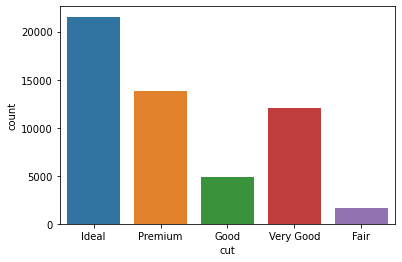

In [182]:
sns.countplot(data.cut)

<AxesSubplot:xlabel='clarity', ylabel='count'>

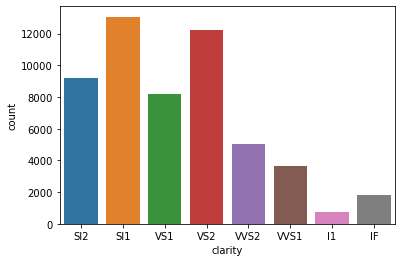

In [183]:
sns.countplot(data.clarity)

<AxesSubplot:xlabel='color', ylabel='count'>

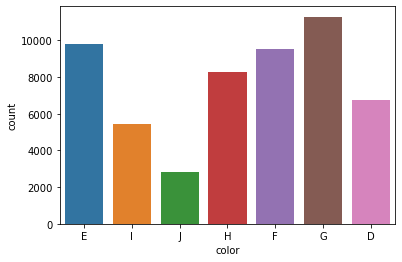

In [184]:
sns.countplot(data.color)

### Numerical

<AxesSubplot:xlabel='carat', ylabel='Density'>

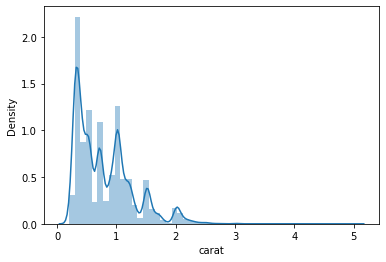

In [185]:
sns.distplot(data['carat'])

<AxesSubplot:xlabel='depth', ylabel='Density'>

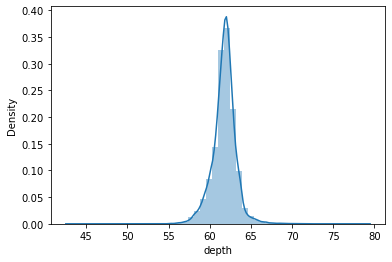

In [186]:
sns.distplot(data['depth'])

<AxesSubplot:xlabel='table', ylabel='Density'>

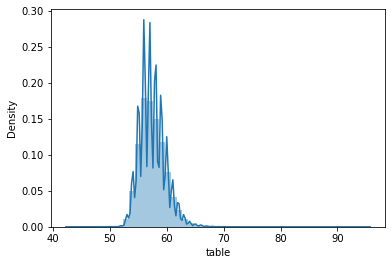

In [187]:
sns.distplot(data['table'])

<AxesSubplot:xlabel='price', ylabel='Density'>

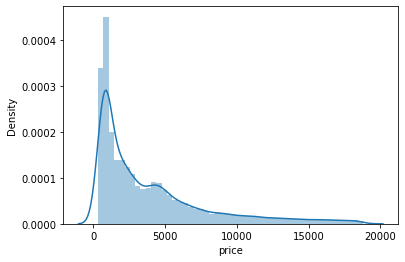

In [188]:
sns.distplot(data['price'])

<AxesSubplot:xlabel='x', ylabel='Density'>

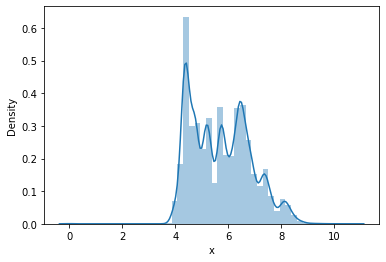

In [189]:
sns.distplot(data['x'])

<AxesSubplot:xlabel='y', ylabel='Density'>

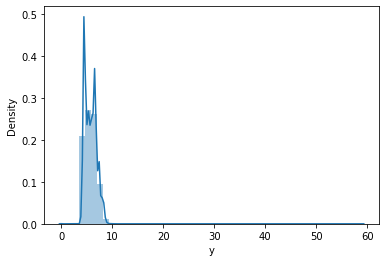

In [190]:
sns.distplot(data['y'])

<AxesSubplot:xlabel='z', ylabel='Density'>

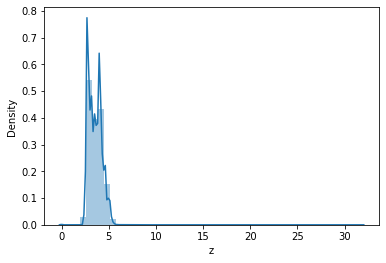

In [191]:
sns.distplot(data['z'])

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['carat','depth','table','price','x','y','z']] = scaler.fit_transform(data[['carat','depth','table','price','x','y','z']])

In [193]:
data.head()

carat      cut color clarity     depth     table     price         x  \
0  0.006237    Ideal     E     SI2  0.513889  0.230769  0.000000  0.367784   
1  0.002079  Premium     E     SI1  0.466667  0.346154  0.000000  0.362197   
2  0.006237     Good     E     VS1  0.386111  0.423077  0.000054  0.377095   
3  0.018711  Premium     I     VS2  0.538889  0.288462  0.000433  0.391061   
4  0.022869     Good     J     SI2  0.563889  0.288462  0.000487  0.404097   

          y         z  
0  0.067572  0.076415  
1  0.065195  0.072642  
2  0.069100  0.072642  
3  0.071817  0.082704  
4  0.073854  0.086478

### Onehot encoding of color, clarity and cut

In [194]:
one_hot = pd.get_dummies(data,prefix = 'cut',columns=['cut'],drop_first=True)
one_hot.insert(loc=2, column='cut', value=data['cut'].values)
one_hot

carat color        cut clarity     depth     table     price  \
0      0.006237     E      Ideal     SI2  0.513889  0.230769  0.000000   
1      0.002079     E    Premium     SI1  0.466667  0.346154  0.000000   
2      0.006237     E       Good     VS1  0.386111  0.423077  0.000054   
3      0.018711     I    Premium     VS2  0.538889  0.288462  0.000433   
4      0.022869     J       Good     SI2  0.563889  0.288462  0.000487   
...         ...   ...        ...     ...       ...       ...       ...   
53935  0.108108     D      Ideal     SI1  0.494444  0.269231  0.131427   
53936  0.108108     D       Good     SI1  0.558333  0.230769  0.131427   
53937  0.103950     D  Very Good     SI1  0.550000  0.326923  0.131427   
53938  0.137214     H    Premium     SI2  0.500000  0.288462  0.131427   
53939  0.114345     D      Ideal     SI2  0.533333  0.230769  0.131427   

              x         y         z  cut_Good  cut_Ideal  cut_Premium  \
0      0.367784  0.067572  0.076415         0          1            0   
1      0.362197  0.065195  0.072642         0          0            1   
2      0.377095  0.069100  0.072642         1          0            0   
3      0.391061  0.071817  0.082704         0          0            1   
4      0.404097  0.073854  0.086478         1          0            0   
...         ...       ...       ...       ...        ...          ...   
53935  0.535382  0.097793  0.110063         0          1            0   
53936  0.529795  0.097623  0.113522         1          0            0   
53937  0.527002  0.096435  0.111950         0          0            0   
53938  0.572626  0.103905  0.117610         0          0            1   
53939  0.542831  0.099660  0.114465         0          1            0   

       cut_Very Good  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
53935              0  
53936              0  
53937              1  
53938              0  
53939              0  

[53940 rows x 14 columns]

In [195]:
one_hot = pd.get_dummies(one_hot,prefix = 'color',columns=['color'],drop_first=True)
one_hot.insert(loc=2, column='color', value=data['color'].values)
one_hot

carat        cut color clarity     depth     table     price  \
0      0.006237      Ideal     E     SI2  0.513889  0.230769  0.000000   
1      0.002079    Premium     E     SI1  0.466667  0.346154  0.000000   
2      0.006237       Good     E     VS1  0.386111  0.423077  0.000054   
3      0.018711    Premium     I     VS2  0.538889  0.288462  0.000433   
4      0.022869       Good     J     SI2  0.563889  0.288462  0.000487   
...         ...        ...   ...     ...       ...       ...       ...   
53935  0.108108      Ideal     D     SI1  0.494444  0.269231  0.131427   
53936  0.108108       Good     D     SI1  0.558333  0.230769  0.131427   
53937  0.103950  Very Good     D     SI1  0.550000  0.326923  0.131427   
53938  0.137214    Premium     H     SI2  0.500000  0.288462  0.131427   
53939  0.114345      Ideal     D     SI2  0.533333  0.230769  0.131427   

              x         y         z  cut_Good  cut_Ideal  cut_Premium  \
0      0.367784  0.067572  0.076415         0          1            0   
1      0.362197  0.065195  0.072642         0          0            1   
2      0.377095  0.069100  0.072642         1          0            0   
3      0.391061  0.071817  0.082704         0          0            1   
4      0.404097  0.073854  0.086478         1          0            0   
...         ...       ...       ...       ...        ...          ...   
53935  0.535382  0.097793  0.110063         0          1            0   
53936  0.529795  0.097623  0.113522         1          0            0   
53937  0.527002  0.096435  0.111950         0          0            0   
53938  0.572626  0.103905  0.117610         0          0            1   
53939  0.542831  0.099660  0.114465         0          1            0   

       cut_Very Good  color_E  color_F  color_G  color_H  color_I  color_J  
0                  0        1        0        0        0        0        0  
1                  0        1        0        0        0        0        0  
2                  0        1        0        0        0        0        0  
3                  0        0        0        0        0        1        0  
4                  0        0        0        0        0        0        1  
...              ...      ...      ...      ...      ...      ...      ...  
53935              0        0        0        0        0        0        0  
53936              0        0        0        0        0        0        0  
53937              1        0        0        0        0        0        0  
53938              0        0        0        0        1        0        0  
53939              0        0        0        0        0        0        0  

[53940 rows x 20 columns]

In [196]:
one_hot = pd.get_dummies(one_hot,prefix = 'clarity',columns=['clarity'],drop_first=True)
one_hot.insert(loc=2, column='clarity', value=data['clarity'].values)
one_hot

carat        cut clarity color     depth     table     price  \
0      0.006237      Ideal     SI2     E  0.513889  0.230769  0.000000   
1      0.002079    Premium     SI1     E  0.466667  0.346154  0.000000   
2      0.006237       Good     VS1     E  0.386111  0.423077  0.000054   
3      0.018711    Premium     VS2     I  0.538889  0.288462  0.000433   
4      0.022869       Good     SI2     J  0.563889  0.288462  0.000487   
...         ...        ...     ...   ...       ...       ...       ...   
53935  0.108108      Ideal     SI1     D  0.494444  0.269231  0.131427   
53936  0.108108       Good     SI1     D  0.558333  0.230769  0.131427   
53937  0.103950  Very Good     SI1     D  0.550000  0.326923  0.131427   
53938  0.137214    Premium     SI2     H  0.500000  0.288462  0.131427   
53939  0.114345      Ideal     SI2     D  0.533333  0.230769  0.131427   

              x         y         z  ...  color_H  color_I  color_J  \
0      0.367784  0.067572  0.076415  ...        0        0        0   
1      0.362197  0.065195  0.072642  ...        0        0        0   
2      0.377095  0.069100  0.072642  ...        0        0        0   
3      0.391061  0.071817  0.082704  ...        0        1        0   
4      0.404097  0.073854  0.086478  ...        0        0        1   
...         ...       ...       ...  ...      ...      ...      ...   
53935  0.535382  0.097793  0.110063  ...        0        0        0   
53936  0.529795  0.097623  0.113522  ...        0        0        0   
53937  0.527002  0.096435  0.111950  ...        0        0        0   
53938  0.572626  0.103905  0.117610  ...        1        0        0   
53939  0.542831  0.099660  0.114465  ...        0        0        0   

       clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0               0            0            1            0            0   
1               0            1            0            0            0   
2               0            0            0            1            0   
3               0            0            0            0            1   
4               0            0            1            0            0   
...           ...          ...          ...          ...          ...   
53935           0            1            0            0            0   
53936           0            1            0            0            0   
53937           0            1            0            0            0   
53938           0            0            1            0            0   
53939           0            0            1            0            0   

       clarity_VVS1  clarity_VVS2  
0                 0             0  
1                 0             0  
2                 0             0  
3                 0             0  
4                 0             0  
...             ...           ...  
53935             0             0  
53936             0             0  
53937             0             0  
53938             0             0  
53939             0             0  

[53940 rows x 27 columns]

In [198]:
one_hot.drop(['cut','color','clarity'],axis=1,inplace=True)

In [205]:
one_hot.columns.__len__()

24

### Seperate features and Labels

In [199]:
X = one_hot.drop(['price'],axis=1)
y = one_hot['price']

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

# Model 1 (increase 2 dense layers in each from next models)

In [206]:
network = tf.keras.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(23,)))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

In [207]:
print(network.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               3072      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13,441
Trainable params: 13,441
Non-trainable params: 0
_________________________________________________________________
None


In [208]:
network.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='mse', metrics=['mae'])

In [210]:
history = network.fit(X_train,y_train, epochs= 20, validation_data = (X_test,y_test), batch_size= 1)

Epoch 1/20
43152/43152 [==============================] - 121s 3ms/step - loss: 0.0048 - mae: 0.0478 - val_loss: 0.0041 - val_mae: 0.0553
Epoch 2/20
43152/43152 [==============================] - 122s 3ms/step - loss: 0.0049 - mae: 0.0482 - val_loss: 0.0074 - val_mae: 0.0615
Epoch 3/20
43152/43152 [==============================] - 125s 3ms/step - loss: 0.0049 - mae: 0.0482 - val_loss: 0.0027 - val_mae: 0.0344
Epoch 4/20
43152/43152 [==============================] - 124s 3ms/step - loss: 0.0055 - mae: 0.0487 - val_loss: 0.0024 - val_mae: 0.0277
Epoch 5/20
43152/43152 [==============================] - 121s 3ms/step - loss: 0.0050 - mae: 0.0481 - val_loss: 0.0021 - val_mae: 0.0310
Epoch 6/20
43152/43152 [==============================] - 111s 3ms/step - loss: 0.0051 - mae: 0.0488 - val_loss: 0.0024 - val_mae: 0.0320
Epoch 7/20
43152/43152 [==============================] - 111s 3ms/step - loss: 0.0052 - mae: 0.0491 - val_loss: 0.0034 - val_mae: 0.0371
Epoch 8/20
43152/43152 [==========

## loss: 0.0053 - mae: 0.0493 - val_loss: 0.0105 - val_mae: 0.0947

In [214]:
pred_y = network.predict(np.reshape(X_test, (-1, 23)))
pred_y

array([[0.13952225],
       [0.2311067 ],
       [0.1723823 ],
       ...,
       [0.1363396 ],
       [0.5011008 ],
       [0.21381587]], dtype=float32)

In [215]:
y_test

1388     0.012597
50052    0.101368
41645    0.049305
42377    0.052873
17244    0.355463
           ...   
44081    0.066389
23713    0.016597
31375    0.023517
21772    0.514137
4998     0.184679
Name: price, Length: 10788, dtype: float64

In [217]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(pred_y,y_test)
rmse = np.sqrt(mean_squared_error(pred_y,y_test))

In [219]:
print('Rsquare :',r2)
print('RMSE :',rmse)

Rsquare : 0.6232658615728118
RMSE : 0.1026152322305004


# Model 2
### [open cv assignment](http://localhost:8888/files/DL_Projects/1484711-1440709-OpenCV___Assignment/Batch_78_80_openCV_Assignment/Open%20cv%20Assignment/openCV_Assignment.pdf)

## `END -----------------------------------------------------`